In [1]:
# Import Data Manipulation Library
import pandas as pd
import numpy as np
# Import Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter Warnings Library
import warnings
warnings.filterwarnings('ignore')
# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log',force = True)
# Import Sci-kit Learn Libraries for Model Building
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_regression
# Importing Metrics for Regression Model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
# Importing Dataset 
df = pd.read_csv('bank .csv')
df.sample(frac = 1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3159,35,admin.,married,secondary,no,725,yes,no,cellular,20,nov,219,7,133,1,failure,no
1316,30,management,married,tertiary,no,3134,yes,no,cellular,17,jul,124,1,-1,0,unknown,no
2347,35,management,single,tertiary,no,71,yes,no,unknown,21,may,836,12,-1,0,unknown,no
3524,45,services,married,secondary,no,0,no,yes,cellular,8,jul,47,7,-1,0,unknown,no
852,36,management,married,secondary,no,-148,no,no,cellular,18,nov,144,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3664,34,technician,married,secondary,no,351,yes,no,cellular,18,jul,467,1,-1,0,unknown,no
1324,41,entrepreneur,married,tertiary,no,171,yes,no,cellular,19,nov,209,1,191,4,failure,no
278,50,blue-collar,married,primary,no,5776,no,no,cellular,18,nov,49,3,-1,0,unknown,no
3448,59,retired,divorced,secondary,no,319,no,no,cellular,24,jul,129,1,-1,0,unknown,no


In [3]:
# Checking Data Columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
# Evaluate Descriptive stats : EDA 

# Step 1: Segreate Categorical Columns and Numerical Column 
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(include = ['int64','float64'])

In [38]:
# step 2: Evaluate Descriptive Stats
from collections import OrderedDict 

stats=[]

for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Maximum':df[i].max(),
        'Minimum':df[i].min(),
        'variance':df[i].var(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),
        'Kurtosis':df[i].kurt()
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

,Feature,Mean,Median,Maximum,Minimum,variance,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,age,41.170095,39.0,87,19,1.118562e+02,33.0,49.0,16.0,10.576211,0.699501,0.348775
1,balance,1422.657819,444.0,71188,-3313,9.057922e+06,69.0,1480.0,1411.0,3009.638142,6.596431,88.390332
2,day,15.915284,16.0,31,1,6.802402e+01,9.0,21.0,12.0,8.247667,0.094627,-1.039531
3,duration,263.961292,185.0,3025,4,6.752547e+04,104.0,329.0,225.0,259.856633,2.772420,12.530050
4,campaign,2.793630,2.0,50,1,9.670897e+00,1.0,3.0,2.0,3.109807,4.743914,37.168920
5,pdays,39.766645,-1.0,871,-1,1.002424e+04,-1.0,-1.0,0.0,100.121124,2.717071,7.957128
6,previous,0.542579,0.0,25,0,2.868153e+00,0.0,0.0,0.0,1.693562,5.875259,51.995212


In [28]:
'''
Note:
# Logistic Regression always works on Sigmoid Function 
# whenever u r doing descriptive statistics IQR of any column cannot be zero.It signifies that such column will not
contribute in machine learning Performance
1. Positive Kurtosis: LeptoKurtic
2. Normal Distribution : MesoKurtic
3. Negative Distribution: PlatyKurtic
......................................
1. Positive Skewness: mode<median<mean
2. No Skewness: Normally Distributed: mean = median = mode
3. Negative Skewness: mean<median<mode
'''


'\nNote:\n# Logistic Regression always works on Sigmoid Function \n# whenever u r doing descriptive statistics IQR of any column cannot be zero.It signifies that such column will not\ncontribute in machine learning Performance\n1. Positive Kurtosis: LeptoKurtic\n2. Normal Distribution : MesoKurtic\n3. Negative Distribution: PlatyKurtic\n......................................\n1. Positive Skewness: mode<median<mean\n2. No Skewness: Normally Distributed: mean = median = mode\n3. Negative Skewness: mean<median<mode\n'

<Axes: xlabel='month', ylabel='duration'>

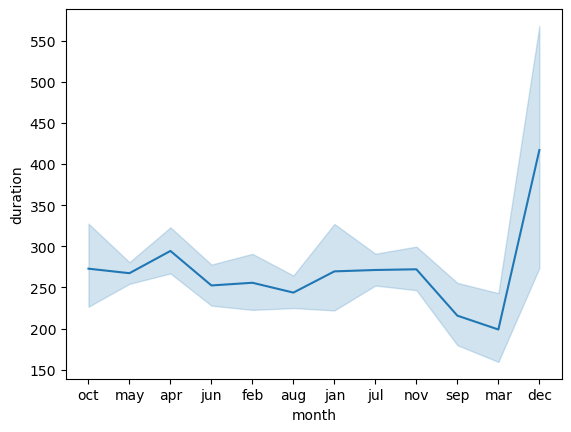

In [30]:
sns.lineplot(x = df['month'], y = df['duration'])